## Pumpkin Varieties and Color

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

Let's look at the relationship between color and variety

In [117]:
import pandas as pd
import numpy as np

full_pumpkins = pd.read_csv('../data/US-pumpkins.csv')

full_pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [118]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']

new_pumpkins = full_pumpkins.drop([c for c in full_pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)

new_pumpkins.info

<bound method DataFrame.info of       City Name  Package  Variety  Origin  Item Size  Color
2             1        3        4       3          3      0
3             1        3        4      17          3      0
4             1        3        4       5          2      0
5             1        3        4       5          2      0
6             1        4        4       5          3      0
...         ...      ...      ...     ...        ...    ...
1694         12        3        5       4          6      1
1695         12        3        5       4          6      1
1696         12        3        5       4          6      1
1697         12        3        5       4          6      1
1698         12        3        5       4          6      1

[991 rows x 6 columns]>

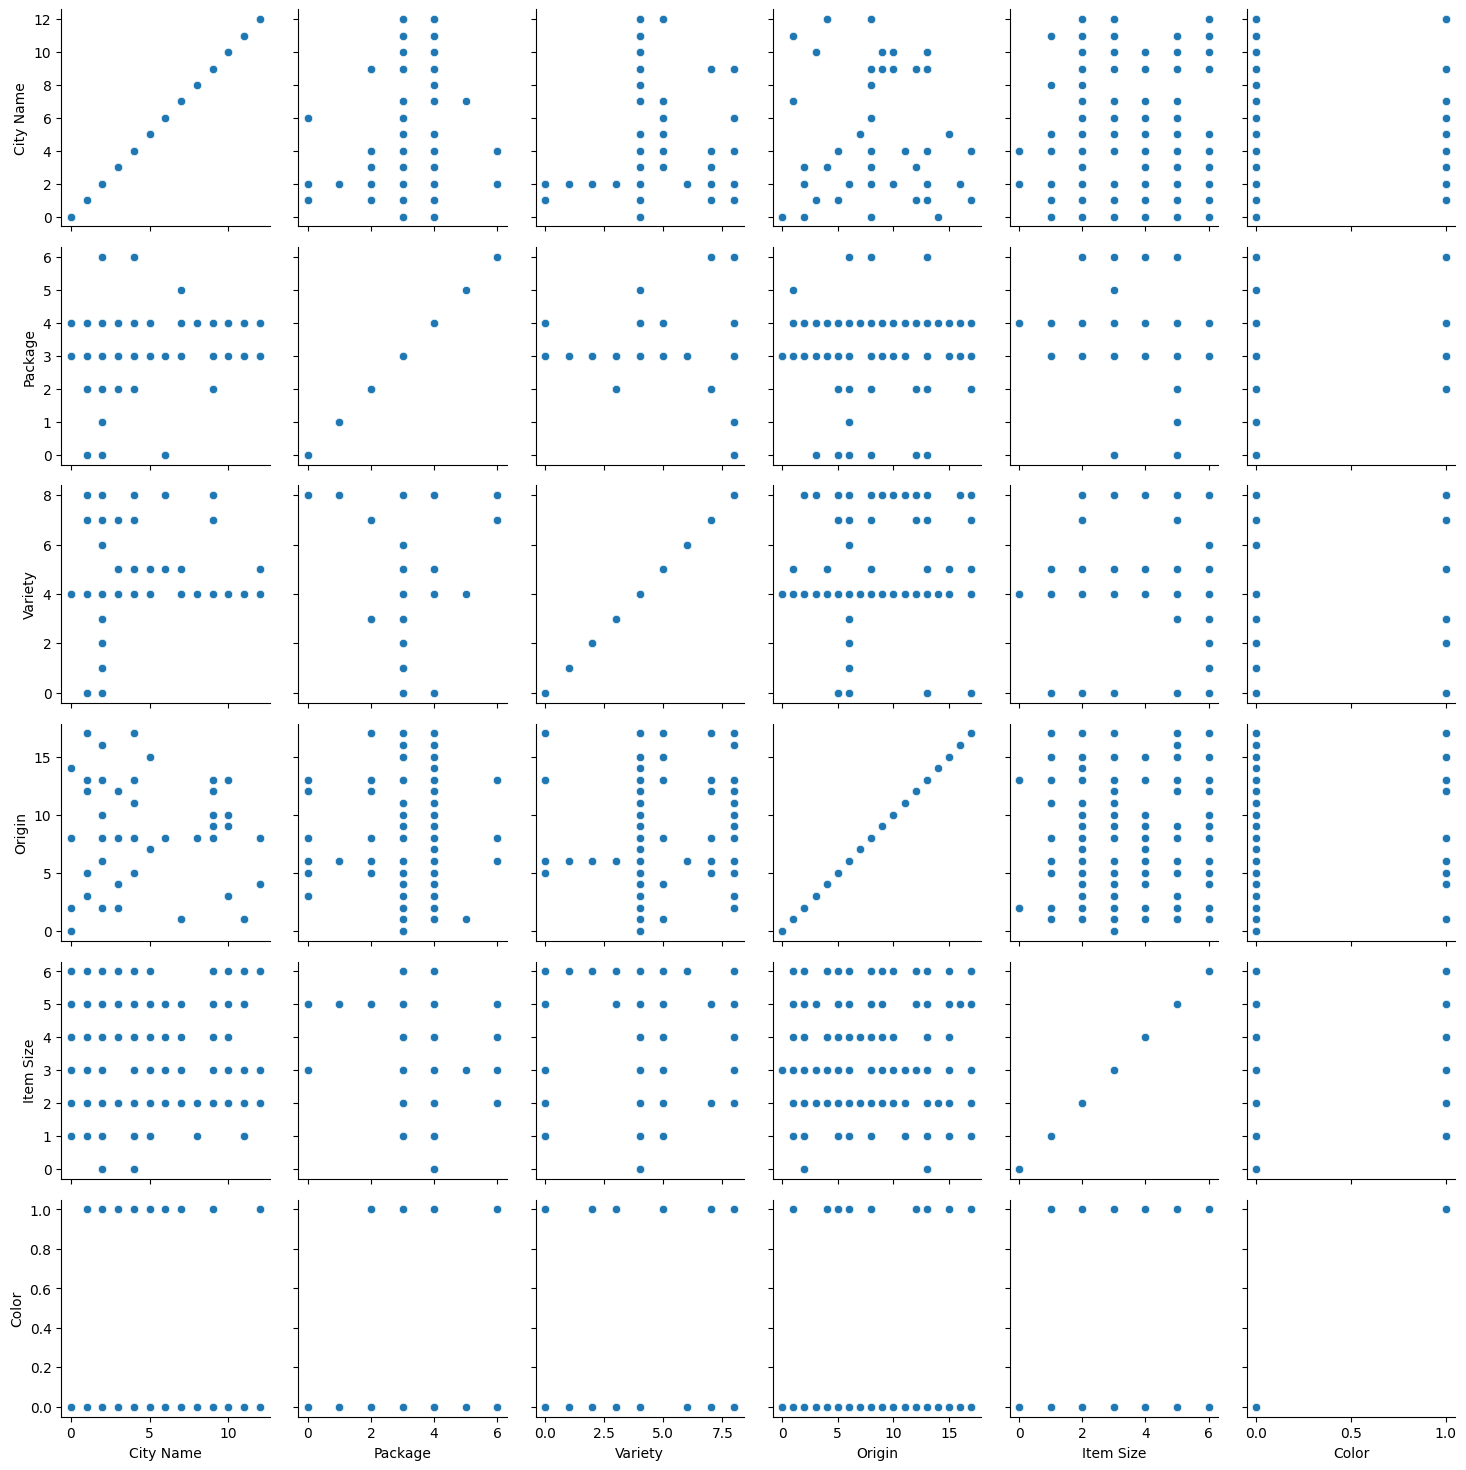

In [119]:
import seaborn as sns

g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)

c:\Users\xiesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\xiesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Color', ylabel='Item Size'>

c:\Users\xiesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\xiesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


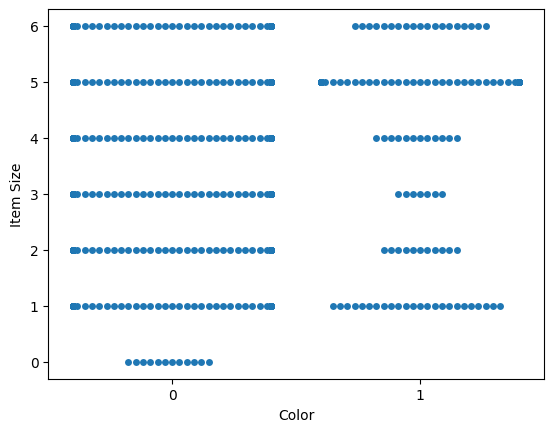

In [120]:
sns.swarmplot(x="Color", y="Item Size", data=new_pumpkins)

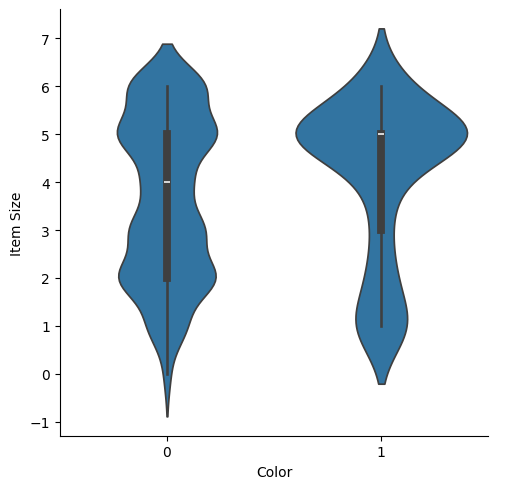

In [121]:
sns.catplot(x="Color", y="Item Size",
            kind="violin", data=new_pumpkins)

In [122]:
from sklearn.model_selection import train_test_split

Selected_features = ['Origin','Item Size','Variety','City Name','Package']

X = new_pumpkins[Selected_features]
y = new_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199

Predicted labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accuracy:  0.8140703517587939


In [124]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 33,   0]])

<Axes: >

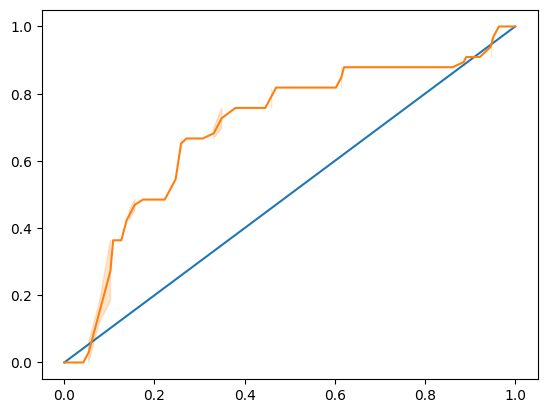

In [125]:
from sklearn.metrics import roc_curve, roc_auc_score

# 概率预测函数 predict_proba方法返回每个样本属于各个类别的概率
y_scores = model.predict_proba(X_test)

# 调用roc_curve函数，传入实际的测试标签y_test和预测的正类概率y_scores[:, 1]，计算出FPR、TPR和对应的阈值。
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
# FPR（False Positive Rate，假阳性率）：假阳性率是指模型错误地将负类样本预测为正类的比例。
# 计算公式为 FPR = FP / (FP + TN)，其中 FP 是假阳性样本的数量，TN 是真阴性样本的数量。
# FPR 越低，模型的特异性越高，即在负类样本中正确识别出负类的能力越强。

# TPR（True Positive Rate，真阳性率）：真阳性率是指模型正确地将正类样本预测为正类的比例。
# 计算公式为 TPR = TP / (TP + FN)，其中 TP 是真阳性样本的数量，FN 是假阴性样本的数量。
# TPR 越高，模型的灵敏度越高，即在正类样本中正确识别出正类的能力越强。

sns.lineplot(x=[0, 1],y=[0,1])
sns.lineplot(x=fpr, y=tpr)

In [126]:
# roc_auc_score函数来计算AUC值
# AUC是ROC曲线下的面积，用于评估分类模型的整体性能。
# AUC值越接近1，模型的分类效果越好；越接近0.5，模型的分类效果越差
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.6976998904709749


In [127]:
# assignment: build a model using all pumpkins data

# full_pumpkins.info()
# full_pumpkins.columns
# to be a list : list(full_pumpkins.columns)

# assignment_pumpkins = full_pumpkins.drop(['Color'], axis=1)

assignment_pumpkins = full_pumpkins.dropna(axis=1, how='all')
assignment_pumpkins = assignment_pumpkins[assignment_pumpkins['Color'].isin(['WHITE','ORANGE'])]
assignment_pumpkins = assignment_pumpkins.apply(LabelEncoder().fit_transform)
assignment_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1129 entries, 2 to 1752
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   City Name        1129 non-null   int64
 1   Type             1129 non-null   int64
 2   Package          1129 non-null   int64
 3   Variety          1129 non-null   int64
 4   Sub Variety      1129 non-null   int64
 5   Date             1129 non-null   int64
 6   Low Price        1129 non-null   int64
 7   High Price       1129 non-null   int64
 8   Mostly Low       1129 non-null   int64
 9   Mostly High      1129 non-null   int64
 10  Origin           1129 non-null   int64
 11  Origin District  1129 non-null   int64
 12  Item Size        1129 non-null   int64
 13  Color            1129 non-null   int64
 14  Unit of Sale     1129 non-null   int64
 15  Repack           1129 non-null   int64
 16  Unnamed: 25      1129 non-null   int64
dtypes: int64(17)
memory usage: 158.8 KB


In [ ]:
y = assignment_pumpkins['Color']
X = assignment_pumpkins[[c for c in assignment_pumpkins.columns if c != 'Color']]

2       0
3       0
4       0
5       0
6       0
       ..
1748    0
1749    0
1750    1
1751    0
1752    1
Name: Color, Length: 1129, dtype: int64

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.94      0.90       187
           1       0.54      0.36      0.43        39

    accuracy                           0.84       226
   macro avg       0.71      0.65      0.67       226
weighted avg       0.82      0.84      0.82       226

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0]
Accuracy:  0.8362831858407079


c:\Users\xiesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [130]:
confusion_matrix(y_test, predictions)

array([[175,  12],
       [ 25,  14]])

<Axes: >

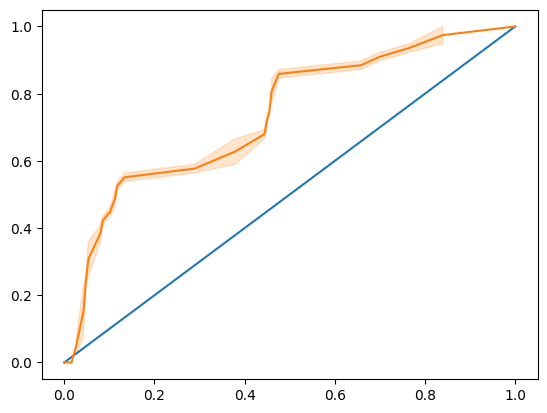

In [131]:
y_scores = model.predict_proba(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])


sns.lineplot(x=[0, 1],y=[0,1])
sns.lineplot(x=fpr, y=tpr)